## Import Libraries and Packages


Before we proceed, let's import the libraries and packages that we will need to complete the rest of this lab.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.src.legacy.preprocessing.image import ImageDataGenerator

## Construct an ImageDataGenerator Instance


In this section, you will learn how to define a Keras ImageDataGenerator instance and use it to load and manipulate data for building a deep learning model.


Before we proceed, let's define a variable that represents the path to the folder containing our data which is <code>concrete_data_week2</code> in this case.


In [2]:
dataset_dir = '../data/cracks'

Keras ImageDataGenerator requires images be arranged in a certain folder hierarchy, where the main directory would contain folders equal to the number of classes in your problem. Since in this case we are trying to build a classifier of two classes, then our main directory, which is <code>concrete_data_week2</code>, should contain two folders, one for each class. This has already been done for you as the negative images are in one folder and the positive images are in another folder.


Let's go ahead and define an instance of the Keras ImageDataGenerator. 


#### Standard ImageDataGenerator


You can define a standard one like this, where you are simply using the ImageDataGenerator to train your model in batches.


In [3]:
# instantiate your image data generator
data_generator = ImageDataGenerator()

Next, you use the <code>flow_from_directory</code> methods to loop through the images in batches. In this method, you pass the directory where the images reside, the size of each batch, *batch_size*, and since batches are sampled randomly, then you can also specify a random seed, *seed*, if you would like to reproduce the batch sampling. In case you would like to resize your images, then you can using the *target_size* argument to accomplish that.


In [4]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
    )

Found 40000 images belonging to 2 classes.


What is great about this method, is it prints a summary of it found in the directory passed. Here, it found 40,000 images in total belonging to 2 classes.


Now, to access the batches, you use the <code>next</code> method as follows:


In [5]:
first_batch = image_generator.__next__()
first_batch

(array([[[[151., 149., 150.],
          [153., 151., 152.],
          [155., 153., 154.],
          ...,
          [153., 149., 148.],
          [153., 149., 148.],
          [153., 149., 148.]],
 
         [[152., 150., 151.],
          [154., 152., 153.],
          [156., 154., 155.],
          ...,
          [154., 150., 149.],
          [154., 150., 149.],
          [154., 150., 149.]],
 
         [[153., 151., 152.],
          [155., 153., 154.],
          [156., 154., 155.],
          ...,
          [156., 152., 151.],
          [156., 152., 151.],
          [156., 152., 151.]],
 
         ...,
 
         [[142., 140., 143.],
          [142., 140., 143.],
          [142., 140., 143.],
          ...,
          [139., 135., 136.],
          [142., 138., 139.],
          [145., 141., 142.]],
 
         [[142., 140., 143.],
          [142., 140., 143.],
          [142., 140., 143.],
          ...,
          [140., 136., 137.],
          [142., 138., 139.],
          [146., 142., 143.

As you can see, this returned the images along with their labels. Therefore, the following returns the images only,


In [6]:
first_batch_images = image_generator.__next__()[0]
first_batch_images

array([[[[172., 174., 169.],
         [176., 178., 173.],
         [181., 183., 178.],
         ...,
         [157., 159., 154.],
         [156., 158., 153.],
         [154., 156., 151.]],

        [[170., 172., 167.],
         [172., 174., 169.],
         [174., 176., 171.],
         ...,
         [155., 157., 152.],
         [154., 156., 151.],
         [153., 155., 150.]],

        [[169., 171., 166.],
         [167., 169., 164.],
         [166., 168., 163.],
         ...,
         [152., 154., 149.],
         [152., 154., 149.],
         [151., 153., 148.]],

        ...,

        [[153., 154., 148.],
         [155., 156., 150.],
         [158., 159., 153.],
         ...,
         [143., 144., 138.],
         [144., 145., 139.],
         [145., 146., 140.]],

        [[147., 148., 142.],
         [150., 151., 145.],
         [153., 154., 148.],
         ...,
         [142., 143., 137.],
         [143., 144., 138.],
         [144., 145., 139.]],

        [[141., 142., 136.],
       

and the following returns the labels only.


In [7]:
# first_batch_labels = image_generator.__next__()[1]
# first_batch_labels

#### Custom ImageDataGenerator


You can also specify some transforms, like scaling, rotations, and flips, that you would like applied to the images when you define an ImageDataGenerator object. Say you want to normalize your images, then you can define your ImageDataGenerator instance as follows:


In [8]:
# instantiate your image data generator
data_generator = ImageDataGenerator(
    rescale=1./255
)

And then you proceed with defining your *image_generator* using the *flow_from_directory* method, just like before.


In [9]:
# image_generator = data_generator.flow_from_directory(
#     dataset_dir,
#     batch_size=4,
#     class_mode='categorical',
#     seed=24
#     )

However, now we explore the first batch using the *next* method, 


In [10]:
first_batch = image_generator.__next__()
first_batch

(array([[[[172., 168., 157.],
          [169., 165., 154.],
          [166., 162., 151.],
          ...,
          [186., 178., 165.],
          [187., 179., 166.],
          [188., 180., 167.]],
 
         [[174., 170., 159.],
          [170., 166., 155.],
          [168., 164., 153.],
          ...,
          [185., 177., 164.],
          [186., 178., 165.],
          [187., 179., 166.]],
 
         [[175., 171., 160.],
          [172., 168., 157.],
          [170., 166., 155.],
          ...,
          [183., 175., 162.],
          [184., 176., 163.],
          [185., 177., 164.]],
 
         ...,
 
         [[188., 184., 172.],
          [188., 184., 172.],
          [187., 183., 171.],
          ...,
          [199., 191., 180.],
          [199., 191., 180.],
          [199., 191., 180.]],
 
         [[194., 190., 178.],
          [193., 189., 177.],
          [192., 188., 176.],
          ...,
          [199., 191., 180.],
          [199., 191., 180.],
          [199., 191., 180.

we find that the values are not integer values anymore, but scaled resolution since the original number are divided by 255.


You can learn more about the Keras ImageDataGeneration class [here](https://keras.io/preprocessing/image/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01).


<a id='item24'></a>


## Visualize Batches of Images


Let write some code to visualize a batch. We will use subplots in order to make visualizing the images easier.


Recall that we can access our batch images as follows:

<code>first_batch_images = image_generator.next()[0] # first batch</code>

<code>second_batch_images = image_generator.next()[0] # second batch</code>

and so on.


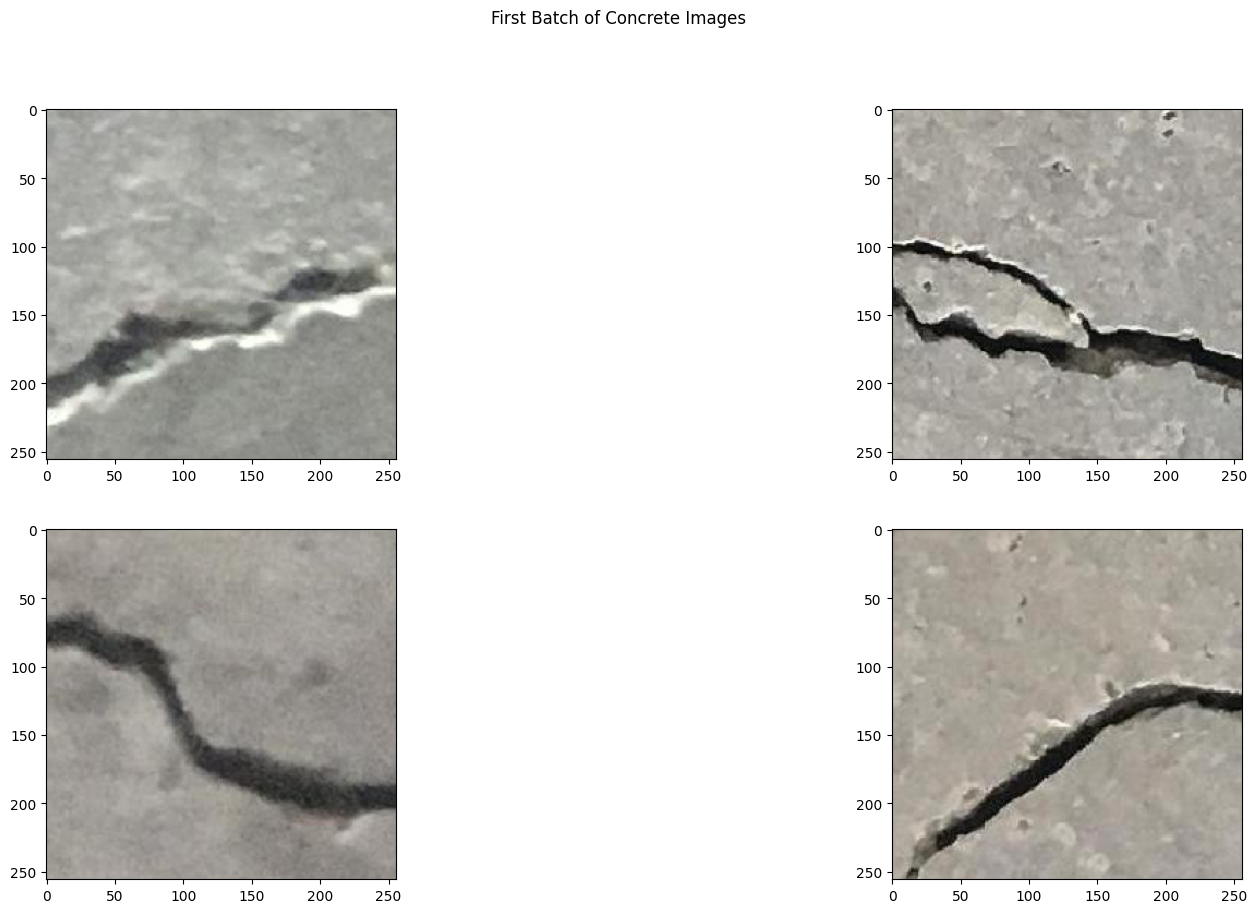

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = first_batch_images[ind].astype(np.uint8)
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images') 
plt.show()

Remember that batches are sampled randomly from the data. In our first batch, we ended up with two negative image and two positive images.


**Important Note**: Because of a bug with the imshow function in Matplotlib, if you are plotting the unscaled RGB images, you have to cast the **image_data** to uint8 before you call the <code>imshow</code> function. So In the code above It looks like this:

image_data = first_batch_images[ind].astype(np.uint8)


## Questions


### Question: Create a plot to visualize the images in the third batch.


In [12]:
second_batch_images = image_generator.__next__()[0]


In [13]:
third_batch_images = image_generator.__next__()[0]


In [14]:
fourth_batch_images = image_generator.__next__()[0]


In [15]:
fifth_batch_images = image_generator.__next__()

In [16]:
third_batch_images

array([[[[198., 197., 193.],
         [198., 197., 193.],
         [194., 193., 189.],
         ...,
         [184., 183., 181.],
         [172., 171., 169.],
         [163., 162., 160.]],

        [[194., 193., 189.],
         [194., 193., 189.],
         [192., 191., 187.],
         ...,
         [181., 180., 178.],
         [169., 168., 166.],
         [159., 158., 156.]],

        [[193., 192., 188.],
         [192., 191., 187.],
         [190., 189., 185.],
         ...,
         [181., 180., 178.],
         [169., 168., 166.],
         [159., 158., 156.]],

        ...,

        [[195., 191., 192.],
         [191., 187., 188.],
         [187., 183., 184.],
         ...,
         [152., 152., 152.],
         [152., 152., 152.],
         [151., 151., 151.]],

        [[192., 188., 189.],
         [187., 183., 184.],
         [182., 178., 179.],
         ...,
         [170., 170., 170.],
         [169., 169., 169.],
         [168., 168., 168.]],

        [[190., 186., 187.],
       

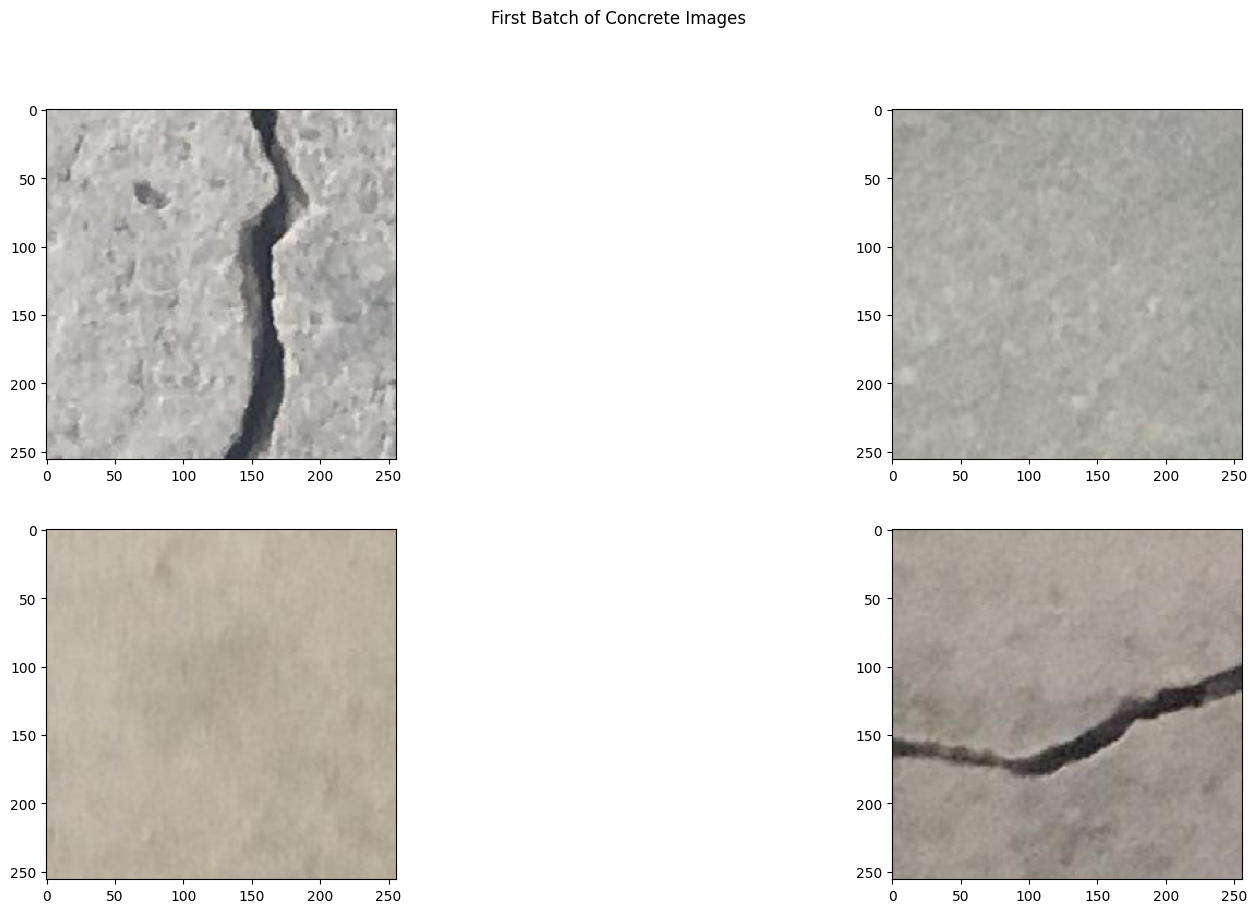

In [17]:
## You can use this cell to type your code to answer the above question
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = third_batch_images[ind].astype(np.uint8)
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images') 
plt.show()

### Question: How many images from each class are in the fourth batch?


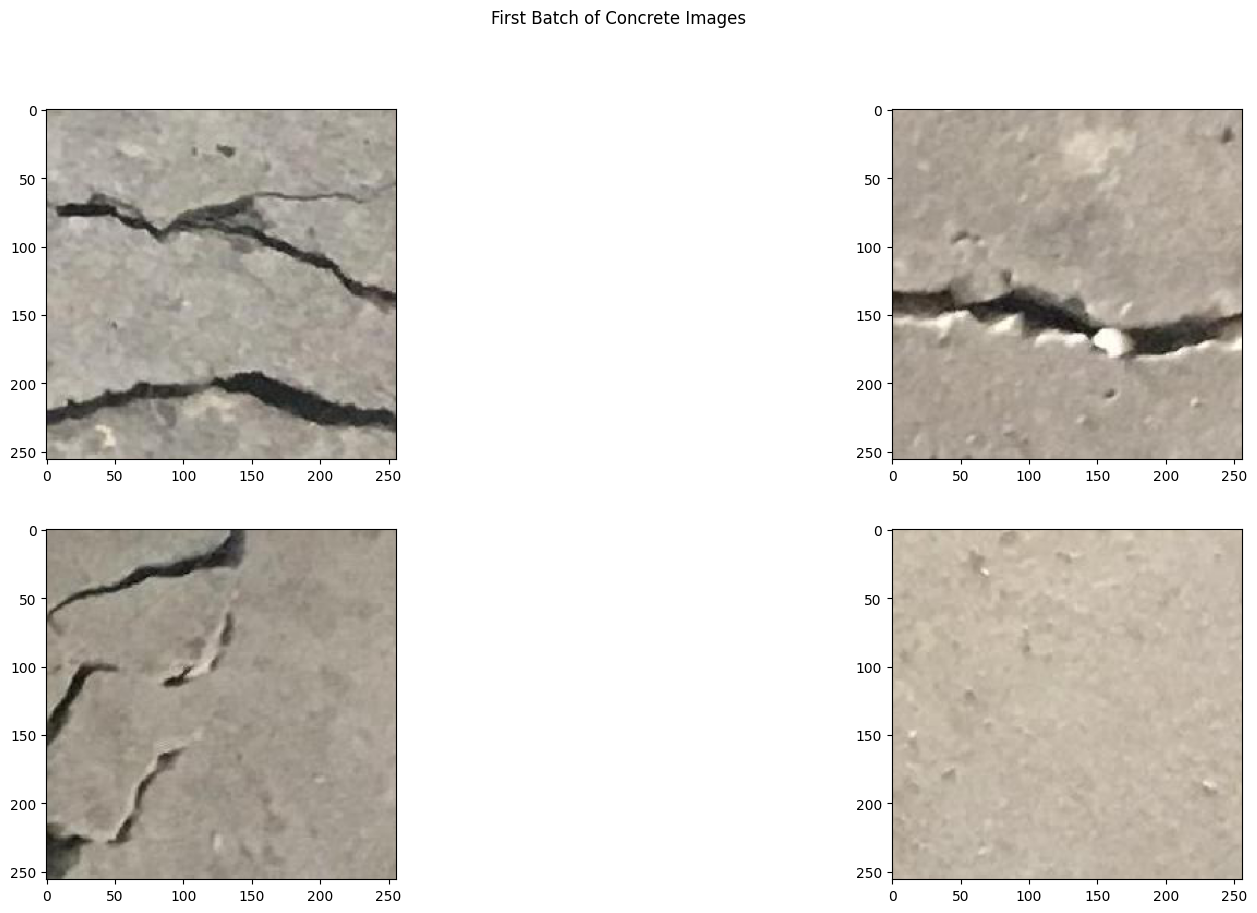

In [18]:
## You can use this cell to type your code to answer the above question


## You can use this cell to type your code to answer the above question
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = fourth_batch_images[ind].astype(np.uint8)
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images') 
plt.show()

### Question: Create a plot to visualize the second image in the fifth batch.


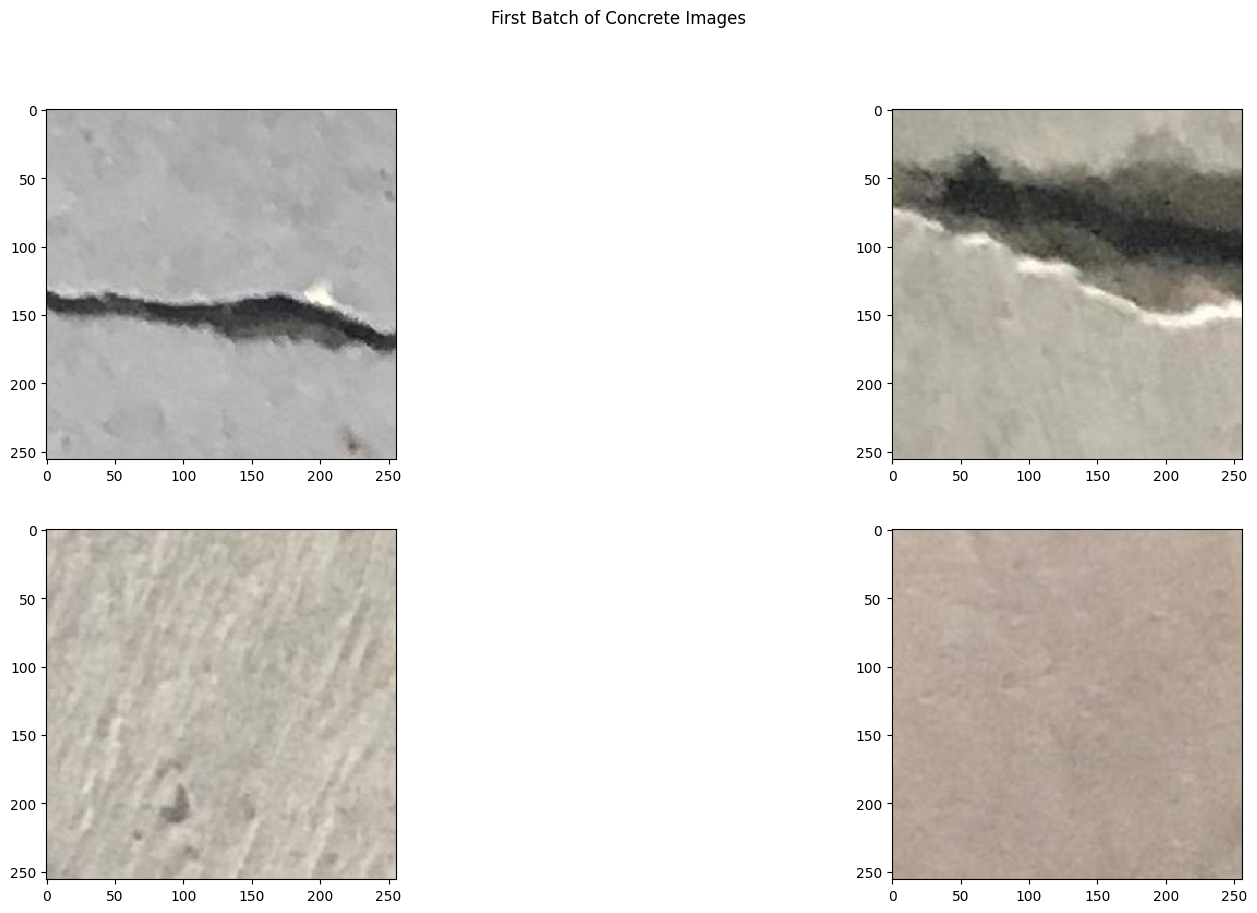

In [19]:
## You can use this cell to type your code to answer the above question
## You can use this cell to type your code to answer the above question
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = fifth_batch_images[0][ind].astype(np.uint8)
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images') 
plt.show()



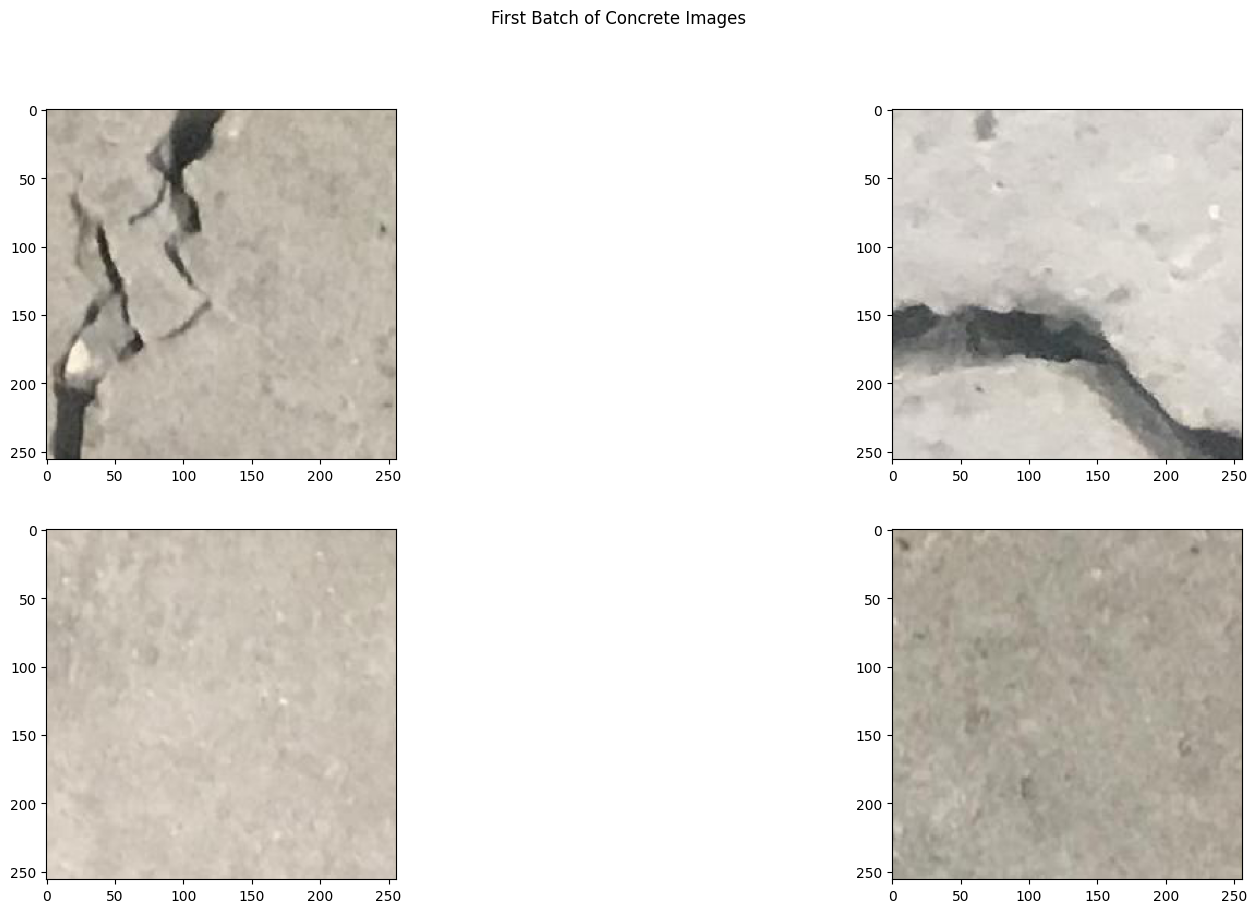

In [21]:
sixth_batch_images = image_generator.__next__()
## You can use this cell to type your code to answer the above question
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = sixth_batch_images[0][ind].astype(np.uint8)
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images') 
plt.show()



### Question: How many images from each class are in the fifth batch?


In [20]:
## You can use this cell to type your code to answer the above question
# Question: How many images from each class are in the fifth batch?

fifth_batch_images[1]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## Import Libraries and Packages


First, we will import the ImageDataGenerator module since we will be leveraging it to train our model in batches.


In [1]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In this lab, we will be using the Keras library to build an image classifier, so let's download the Keras library.


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Finally, we will be leveraging the ResNet50 model to build our classifier, so let's download it as well.


In [4]:
from keras.applications import ResNet50, VGG16
from keras.applications.resnet50 import preprocess_input

## Define Global Constants


Here, we will define constants that we will be using throughout the rest of the lab. 

1. We are obviously dealing with two classes, so *num_classes* is 2. 
2. The ResNet50 model was built and trained using images of size (224 x 224). Therefore, we will have to resize our images from (227 x 227) to (224 x 224).
3. We will training and validating the model using batches of 100 images.


In [4]:
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100

<a id='item34'></a>


## Construct ImageDataGenerator Instances


In order to instantiate an ImageDataGenerator instance, we will set the **preprocessing_function** argument to *preprocess_input* which we imported from **keras.applications.resnet50** in order to preprocess our images the same way the images used to train ResNet50 model were processed.


In [5]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

Next, we will use the *flow_from_directory* method to get the training images as follows:


In [6]:
train_generator = data_generator.flow_from_directory(
    '../data/cracks',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 40000 images belonging to 2 classes.


**Note**: in this lab, we will be using the full data-set of 30,000 images for training and validation.


**Your Turn**: Use the *flow_from_directory* method to get the validation images and assign the result to **validation_generator**.


In [7]:
validation_generator = data_generator.flow_from_directory(
    '../data/cracks',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical')

Found 40000 images belonging to 2 classes.


Double-click __here__ for the solution.
<!-- The correct answer is:
validation_generator = data_generator.flow_from_directory(
    'concrete_data_week3/valid',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical')
-->



<a id='item35'></a>


## Build, Compile and Fit Model


In this section, we will start building our model. We will use the Sequential model class from Keras.


In [8]:
model = Sequential()

Next, we will add the ResNet50 pre-trained model to out model. However, note that we don't want to include the top layer or the output layer of the pre-trained model. We actually want to define our own output layer and train it so that it is optimized for our image dataset. In order to leave out the output layer of the pre-trained model, we will use the argument *include_top* and set it to **False**.


In [9]:
model.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

Then, we will define our output layer as a **Dense** layer, that consists of two nodes and uses the **Softmax** function as the activation function.


In [10]:
model.add(Dense(num_classes, activation='softmax'))

You can access the model's layers using the *layers* attribute of our model object. 


In [11]:
model.layers

[<Functional name=resnet50, built=True>, <Dense name=dense, built=True>]

You can see that our model is composed of two sets of layers. The first set is the layers pertaining to ResNet50 and the second set is a single layer, which is our Dense layer that we defined above.


You can access the ResNet50 layers by running the following:


In [12]:
model.layers[0].layers

[<InputLayer name=input_layer, built=True>,
 <ZeroPadding2D name=conv1_pad, built=True>,
 <Conv2D name=conv1_conv, built=True>,
 <BatchNormalization name=conv1_bn, built=True>,
 <Activation name=conv1_relu, built=True>,
 <ZeroPadding2D name=pool1_pad, built=True>,
 <MaxPooling2D name=pool1_pool, built=True>,
 <Conv2D name=conv2_block1_1_conv, built=True>,
 <BatchNormalization name=conv2_block1_1_bn, built=True>,
 <Activation name=conv2_block1_1_relu, built=True>,
 <Conv2D name=conv2_block1_2_conv, built=True>,
 <BatchNormalization name=conv2_block1_2_bn, built=True>,
 <Activation name=conv2_block1_2_relu, built=True>,
 <Conv2D name=conv2_block1_0_conv, built=True>,
 <Conv2D name=conv2_block1_3_conv, built=True>,
 <BatchNormalization name=conv2_block1_0_bn, built=True>,
 <BatchNormalization name=conv2_block1_3_bn, built=True>,
 <Add name=conv2_block1_add, built=True>,
 <Activation name=conv2_block1_out, built=True>,
 <Conv2D name=conv2_block2_1_conv, built=True>,
 <BatchNormalization na

Since the ResNet50 model has already been trained, then we want to tell our model not to bother with training the ResNet part, but to train only our dense output layer. To do that, we run the following.


In [13]:
model.layers[0].trainable = False

And now using the *summary* attribute of the model, we can see how many parameters we will need to optimize in order to train the output layer.


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         4,098 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,591,810 (90.00 MB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Next we compile our model using the **adam** optimizer.


In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Before we are able to start the training process, with an ImageDataGenerator, we will need to define how many steps compose an epoch. Typically, that is the number of images divided by the batch size. Therefore, we define our steps per epoch as follows:


In [16]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 2

Finally, we are ready to start training our model. Unlike a conventional deep learning training were data is not streamed from a directory, with an ImageDataGenerator where data is augmented in batches, we use the **fit_generator** method.


In [17]:
fit_history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

Epoch 1/2


c:\Users\badrg\anaconda3\envs\vscode\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


400/400 ━━━━━━━━━━━━━━━━━━━━ 3515s 9s/step - accuracy: 0.9800 - loss: 0.0521 - val_accuracy: 0.9987 - val_loss: 0.0050
Epoch 2/2


c:\Users\badrg\anaconda3\envs\vscode\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


Now that the model is trained, you are ready to start using it to classify images.


Since training can take a long time when building deep learning models, it is always a good idea to save your model once the training is complete if you believe you will be using the model again later. You will be using this model in the next module, so go ahead and save your model.


In [18]:
model.save('../data/classifier_resnet_model.h5')

Now, you should see the model file *classifier_resnet_model.h5* apprear in the left directory pane.


## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [5]:
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100

In [6]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [7]:
train_generator = data_generator.flow_from_directory(
    '../data/cracks',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 40000 images belonging to 2 classes.


In [9]:
validation_generator = data_generator.flow_from_directory(
    '../data/cracks',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical')

Found 40000 images belonging to 2 classes.


In [10]:
model = Sequential()
model.add(VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))
model.add(Dense(num_classes, activation='softmax'))
model.layers
model.layers[0].layers
model.layers[0].trainable = False
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 2
fit_history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)
model.save('../data/classifier_resnet_model.h5')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 512)            │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,714 (56.14 MB)

 Trainable params: 1,026 (4.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/2


c:\Users\badrg\anaconda3\envs\vscode\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 46/400 ━━━━━━━━━━━━━━━━━━━━ 55:22 9s/step - accuracy: 0.5894 - loss: 0.7939

KeyboardInterrupt: 

<a id="item43"></a>

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

<a id="item44"></a>

## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.